dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_5_folds.csv')

In [3]:
useful_features = [col for col in df.columns if col not in ("Time", "Class", "kfold")]

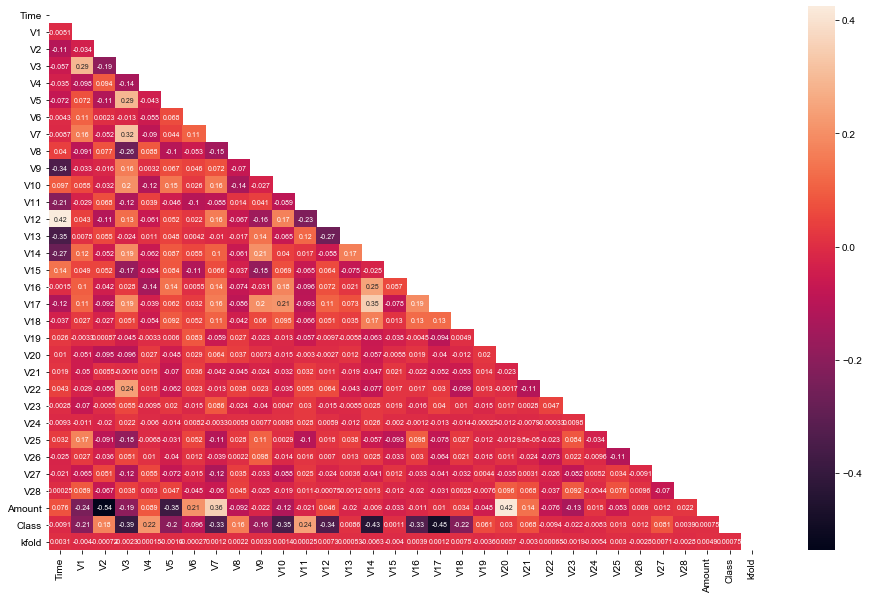

In [4]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 7})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

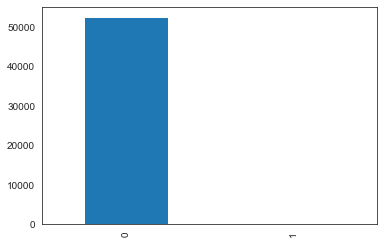

In [5]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

Fold: 0
Accuracy: 0.9965782720273738

Fold: 1
Accuracy: 0.9986693280106453

Fold: 2
Accuracy: 0.998764376009885

Fold: 3
Accuracy: 0.9980990400152077

Fold: 4
Accuracy: 0.9977188480182492


---------------------------

Accuracy of Predictions =  0.9979659728162723

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       1.00      0.23      0.37        31

    accuracy                           1.00     10521
   macro avg       1.00      0.61      0.68     10521
weighted avg       1.00      1.00      1.00     10521


---------------------------



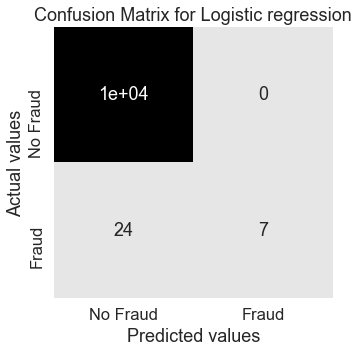

In [6]:
#logistic regression
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    #inititalizing logistic regression
    model_lg = LogisticRegression(random_state=42)
    model_lg.fit(xtrain, ytrain)
    y_pred_lg = model_lg.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_lg)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_lg))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_lg)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')

plt.show()

Fold: 0
Accuracy: 0.9971485600228115

Fold: 1
Accuracy: 0.9971485600228115

Fold: 2
Accuracy: 0.9961980800304153

Fold: 3
Accuracy: 0.997053512023572

Fold: 4
Accuracy: 0.9969584640243323


---------------------------

Accuracy of Predictions =  0.9969014352247886

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       0.00      0.00      0.00        31

    accuracy                           1.00     10521
   macro avg       0.50      0.50      0.50     10521
weighted avg       0.99      1.00      1.00     10521


---------------------------



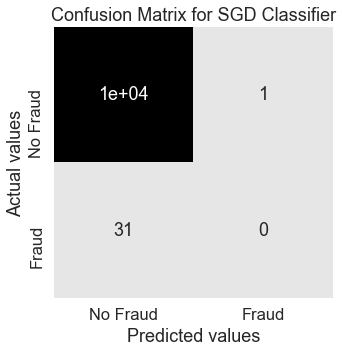

In [7]:
#SGDClassifier
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    sgd_classifier = SGDClassifier(loss='log',shuffle=True, random_state=42)
    sgd_classifier.fit(xtrain, ytrain)
    y_pred_sgd = sgd_classifier.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_sgd)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_sgd))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_sgd)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for SGD Classifier')

plt.show()

Fold: 0
Accuracy: 0.9974337040205303

Fold: 1
Accuracy: 0.9973386560212908

Fold: 2
Accuracy: 0.9976238000190096

Fold: 3
Accuracy: 0.9973386560212908

Fold: 4
Accuracy: 0.9974337040205303


---------------------------

Accuracy of Predictions =  0.9974337040205302

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       1.00      0.13      0.23        31

    accuracy                           1.00     10521
   macro avg       1.00      0.56      0.61     10521
weighted avg       1.00      1.00      1.00     10521


---------------------------



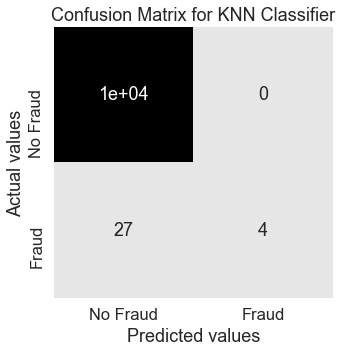

In [8]:
#KNN classifier
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2).fit(xtrain, ytrain)
    y_pred_knn = knn_classifier.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_knn)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_knn))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_knn)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for KNN Classifier')

plt.show()

Fold: 0
Accuracy: 0.9986693280106453

Fold: 1
Accuracy: 0.9985742800114058

Fold: 2
Accuracy: 0.9980990400152077

Fold: 3
Accuracy: 0.9981940880144473

Fold: 4
Accuracy: 0.9984792320121662


---------------------------

Accuracy of Predictions =  0.9984031936127744

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       0.89      0.55      0.68        31

    accuracy                           1.00     10521
   macro avg       0.95      0.77      0.84     10521
weighted avg       1.00      1.00      1.00     10521


---------------------------



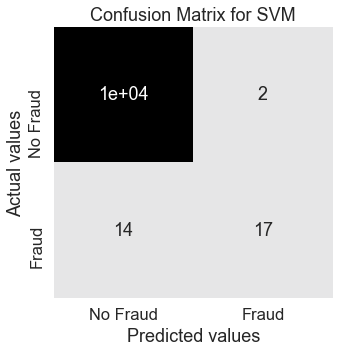

In [9]:
# SVM
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    classifier_svm = SVC(kernel = 'linear', random_state=0).fit(xtrain, ytrain)
    y_pred_svm = classifier_svm.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_svm)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_svm))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_svm)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for SVM')

plt.show()

Fold: 0
Accuracy: 0.9971485600228115

Fold: 1
Accuracy: 0.9971485600228115

Fold: 2
Accuracy: 0.997053512023572

Fold: 3
Accuracy: 0.997053512023572

Fold: 4
Accuracy: 0.997053512023572


---------------------------

Accuracy of Predictions =  0.9970915312232679

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       0.00      0.00      0.00        31

    accuracy                           1.00     10521
   macro avg       0.50      0.50      0.50     10521
weighted avg       0.99      1.00      1.00     10521


---------------------------



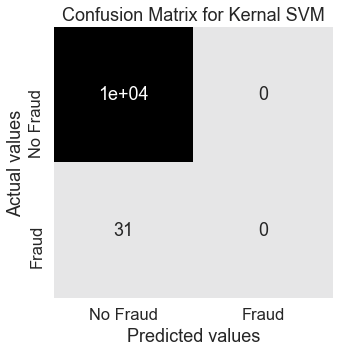

In [10]:
# kernal svm
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    # kernal svm training
    classifier_ksvm = SVC(kernel ='rbf', random_state = 0)
    classifier_ksvm.fit(xtrain, ytrain)
    y_pred_ksvm = classifier_ksvm.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_ksvm)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_ksvm))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_ksvm)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Kernal SVM')

plt.show()

Fold: 0
Accuracy: 0.9859328961125369

Fold: 1
Accuracy: 0.9859328961125369

Fold: 2
Accuracy: 0.9835566961315464

Fold: 3
Accuracy: 0.9846022241231822

Fold: 4
Accuracy: 0.983651744130786


---------------------------

Accuracy of Predictions =  0.9847352913221178

---------------------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10490
           1       0.14      0.87      0.24        31

    accuracy                           0.98     10521
   macro avg       0.57      0.93      0.62     10521
weighted avg       1.00      0.98      0.99     10521


---------------------------



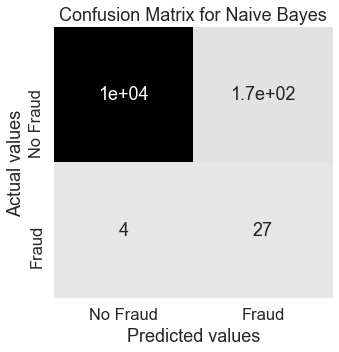

In [11]:
# Naive Bayes
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    classifier_nb = GaussianNB()
    classifier_nb.fit(xtrain, ytrain)
    y_pred_nb = classifier_nb.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_nb)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_nb))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_nb)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Naive Bayes')

plt.show()

Fold: 0
Accuracy: 1.0

Fold: 1
Accuracy: 1.0

Fold: 2
Accuracy: 1.0

Fold: 3
Accuracy: 1.0

Fold: 4
Accuracy: 1.0


---------------------------

Accuracy of Predictions =  1.0

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       1.00      1.00      1.00        31

    accuracy                           1.00     10521
   macro avg       1.00      1.00      1.00     10521
weighted avg       1.00      1.00      1.00     10521


---------------------------



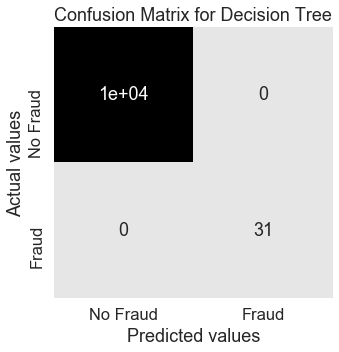

In [12]:
# decision tree
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_dt.fit(xtrain, ytrain)
    y_pred_dt = classifier_dt.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_dt)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_dt))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_dt)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree')

plt.show()

Fold: 0
Accuracy: 1.0

Fold: 1
Accuracy: 1.0

Fold: 2
Accuracy: 1.0

Fold: 3
Accuracy: 1.0

Fold: 4
Accuracy: 1.0


---------------------------

Accuracy of Predictions =  1.0

---------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10490
           1       1.00      1.00      1.00        31

    accuracy                           1.00     10521
   macro avg       1.00      1.00      1.00     10521
weighted avg       1.00      1.00      1.00     10521


---------------------------



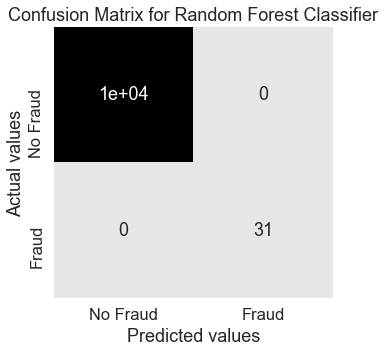

In [13]:
# Random Forest
final_predictions = []
scores = []
for fold in range(5):
    xtrain = df[df.kfold != fold].reset_index(drop=True)
    xtest = df[df.kfold == fold].reset_index(drop=True)
    
    ytrain = xtrain.Class
    ytest = xtest.Class
    
    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(xtrain[useful_features])
    xtrain[useful_features] = standard_scaler.transform(xtrain[useful_features])
    xtest[useful_features] = standard_scaler.transform(xtest[useful_features])
    
    classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier_rf.fit(xtrain, ytrain)
    y_pred_rf = classifier_rf.predict(xtest)
    #print(ypred)
    accuracy = accuracy_score(ytest, y_pred_rf)
    
    print(f"Fold: {fold}")
    print(f"Accuracy: {accuracy}")
    print("")
    scores.append(accuracy)
    
print("\n---------------------------\n")
print("Accuracy of Predictions = ",np.mean(scores))

print("\n---------------------------\n")
print(classification_report(ytest, y_pred_rf))


print("\n---------------------------\n")
# get confusion matrix from sklearn
cm = confusion_matrix(ytest, y_pred_rf)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(1, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.show()

In [16]:
y_pred = pd.DataFrame()

y_pred['Log.reg'] = y_pred_lg
y_pred['SGD'] = y_pred_sgd
y_pred['knn'] = y_pred_knn
y_pred['SVM'] = y_pred_svm
y_pred['kernal SVM'] = y_pred_ksvm
y_pred['Naive Bayes'] = y_pred_nb
y_pred['Decision Tree'] = y_pred_dt
y_pred['Random Forest'] = y_pred_rf
y_pred['Class'] = ytest

y_pred

,Log.reg,SGD,knn,SVM,kernal SVM,Naive Bayes,Decision Tree,Random Forest,Class
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10516,0,0,0,0,0,0,0,0,0
10517,0,0,0,0,0,0,0,0,0
10518,0,0,0,0,0,0,0,0,0
10519,0,0,0,0,0,0,0,0,0


In [18]:
# picking the best one as Random forest classifier
file = open('Fraud_Detection.pkl', 'wb')
pickle.dump(classifier_rf, file)